<a href="https://colab.research.google.com/github/NathanBvumbwe/peza_ganyu/blob/main/model2_recomender_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets
!pip install torch

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data_job_categories.csv')
print(df.head())

                                     title         category
0       Finance & Administration Assistant          Finance
1          Volunteer Liaison (2 Positions)  Human Resources
2            Finance and Program Assistant          Finance
3             Account Relationship Officer          Finance
4  Media Monitoring and Evaluation Officer        Marketing


In [12]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the job titles
def tokenize(text):
    return tokenizer(text, padding='max_length', truncation=True, return_tensors='pt')

train_encodings = tokenize(train_df['title'].tolist())
test_encodings = tokenize(test_df['title'].tolist())

In [14]:
import torch

class JobDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Assuming 'category' is your label
train_dataset = JobDataset(train_encodings, train_df['category'].tolist())
test_dataset = JobDataset(test_encodings, test_df['category'].tolist())

In [5]:
!pip install -U transformers


In [16]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['category'].unique()))

# Set up training arguments without evaluation strategy
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10  # Log every 10 steps
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nathanbvumbwe21 (nathanbvumbwe21-mzuzu-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


TypeError: new(): invalid data type 'str'

In [17]:
import pandas as pd
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the dataset
df = pd.read_csv('data_job_categories.csv')
print(df.head())  # Check the first few rows for confirmation

# Load BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['category'].unique()))

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10  # Log every 10 steps
)

# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

                                     title         category
0       Finance & Administration Assistant          Finance
1          Volunteer Liaison (2 Positions)  Human Resources
2            Finance and Program Assistant          Finance
3             Account Relationship Officer          Finance
4  Media Monitoring and Evaluation Officer        Marketing


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: new(): invalid data type 'str'

In [8]:
# Step 1: Reset Python state
%reset -f

# Step 2: Force reinstall latest transformers
!pip install -U transformers

# Step 3: Re-import after clean install
from transformers import TrainingArguments
print(TrainingArguments.__module__)


transformers.training_args


In [9]:
args = TrainingArguments(
    output_dir="./test",
    evaluation_strategy="steps"
)
print("Success!")


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

TAIYAMBILASO APA MAN

In [18]:
# Step 1: Load the dataset
import pandas as pd

df = pd.read_csv('data_job_categories.csv')
print(df.head())  # Check the first few rows

                                     title         category
0       Finance & Administration Assistant          Finance
1          Volunteer Liaison (2 Positions)  Human Resources
2            Finance and Program Assistant          Finance
3             Account Relationship Officer          Finance
4  Media Monitoring and Evaluation Officer        Marketing


In [19]:
# Step 2: Split the dataset
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
# Step 3: Encode the labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['category'].tolist())
test_labels = label_encoder.transform(test_df['category'].tolist())

In [21]:
# Step 4: Load BERT tokenizer
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [22]:
# Step 5: Tokenize the job titles
def tokenize(text):
    return tokenizer(text, padding='max_length', truncation=True, return_tensors='pt', max_length=128)

train_encodings = tokenize(train_df['title'].tolist())
test_encodings = tokenize(test_df['title'].tolist())

In [23]:
# Step 6: Create a Dataset class
import torch

class JobDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [24]:
# Step 7: Create datasets
train_dataset = JobDataset(train_encodings, train_labels)
test_dataset = JobDataset(test_encodings, test_labels)

In [25]:
# Step 8: Load BERT model
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
# Step 9: Set up training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

In [30]:
# Step 10: Create Trainer instance
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [31]:
# Step 11: Train the model
trainer.train()

Step,Training Loss
10,2.911400
20,2.878600
30,2.839200
40,2.814000
50,2.786900
60,2.717900
70,2.704400
80,2.686900
90,2.648300
100,2.627300


TrainOutput(global_step=270, training_loss=2.422454018063015, metrics={'train_runtime': 2883.2149, 'train_samples_per_second': 0.745, 'train_steps_per_second': 0.094, 'total_flos': 141307128419328.0, 'train_loss': 2.422454018063015, 'epoch': 3.0})

In [32]:
# Step 12: Evaluate the model (optional)
trainer.evaluate()

{'eval_loss': 1.5280487537384033,
 'eval_runtime': 68.9286,
 'eval_samples_per_second': 2.597,
 'eval_steps_per_second': 0.334,
 'epoch': 3.0}

In [33]:
!pip install scikit-learn
!pip install datasets

In [34]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Step 1: Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Step 2: Calculate metrics
accuracy = accuracy_score(test_labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, preds, average='weighted')

# Step 3: Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6257
Precision: 0.5823
Recall: 0.6257
F1 Score: 0.5660


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Step 12: Evaluate the model (optional)
trainer.evaluate()

# Additional evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, preds, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6257
Precision: 0.5823
Recall: 0.6257
F1 Score: 0.5660


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
import os
import shutil
from transformers import BertForSequenceClassification, BertTokenizer

# Step 1: Save the model and tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')

# Step 2: Zip the saved model directory
shutil.make_archive('saved_model', 'zip', './saved_model')

# Step 3: List the files for confirmation
os.listdir('./saved_model')

['tokenizer_config.json',
 'vocab.txt',
 'config.json',
 'special_tokens_map.json',
 'model.safetensors']

In [38]:
from google.colab import files

files.download('saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RE-TRAINING THE MODEL

In [43]:
# Step 9: Set up training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,  # Increased number of epochs
    per_device_train_batch_size=16,  # Increased batch size
    per_device_eval_batch_size=16,    # Increased eval batch size
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

In [44]:
# Step 10: Create Trainer instance
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [45]:
# Step 11: Train the model
trainer.train()

Step,Training Loss
10,1.423600
20,1.318900
30,1.428300
40,1.357900
50,1.354400
60,1.394000
70,1.238400
80,1.203300
90,1.140300
100,1.169700


TrainOutput(global_step=225, training_loss=1.0062047290802, metrics={'train_runtime': 4465.7251, 'train_samples_per_second': 0.802, 'train_steps_per_second': 0.05, 'total_flos': 235511880698880.0, 'train_loss': 1.0062047290802, 'epoch': 5.0})

In [46]:
# Step 10: Evaluate the model
eval_results = trainer.evaluate()

# Print evaluation results
print(eval_results)

{'eval_loss': 0.7393033504486084, 'eval_runtime': 66.8227, 'eval_samples_per_second': 2.679, 'eval_steps_per_second': 0.18, 'epoch': 5.0}


In [47]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Get predictions
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Assuming test_labels contains your true labels
accuracy = accuracy_score(test_labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, preds, average='weighted')

# Print detailed metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8101
Precision: 0.8313
Recall: 0.8101
F1 Score: 0.7995


In [48]:
!pip install matplotlib

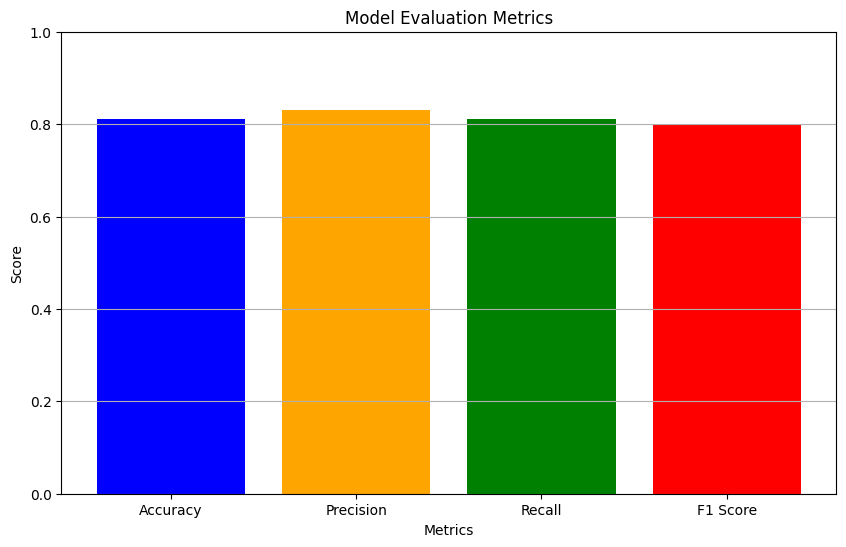

In [49]:
import matplotlib.pyplot as plt

# Assuming you have the metrics from the evaluation
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Setting the y-axis limits
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show the plot
plt.show()

In [52]:
import os
import shutil

# Save the model and tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')

# Zip the saved model directory
shutil.make_archive('saved_model', 'zip', './saved_model')

'/content/saved_model.zip'

In [53]:
from google.colab import files

# Download the zipped file
files.download('saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>